#### By: Peyman Shahidi
#### Created: Aug 1, 2025

<br>

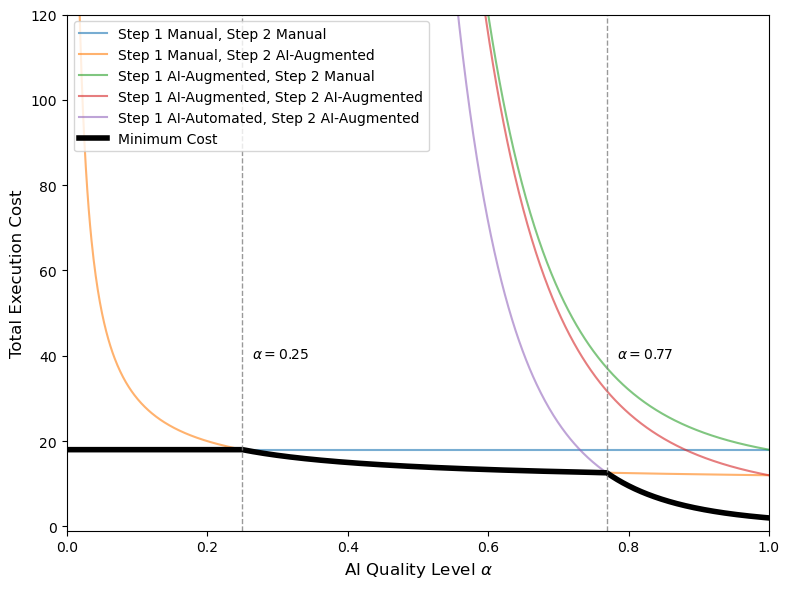

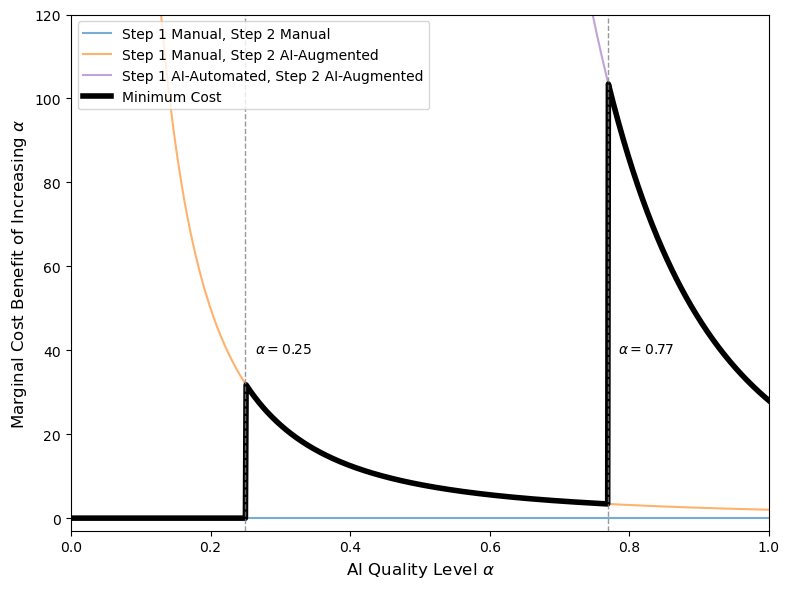

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os

main_folder_path = ".."
input_data_path = f"{main_folder_path}/data"
output_plot_path = f"{main_folder_path}/writeup/plots"

# Create directories if they don't exist
for path in [output_plot_path]:
    if not os.path.exists(path):
        os.makedirs(path)

# Parameters
c1h, t1h = 5, 1
c1m, t1m = 5, 1
c2h, t2h = 2, 4
c2m, t2m = 2, 1
d1, d2 = 6, 1
t_handoff = 1

# Alpha range
alpha = np.linspace(0.001, 1, 1000)

# Cost calculations
cost_manual = c1h * (t1h + t_handoff) + c2h * t2h
cost_1h_2ai = c1h * (t1h + t_handoff) + c2m * (t2m / alpha**(d2))
cost_1ai_2h = c1m * (t1m / alpha**(d1) + t_handoff) + c2h * t2h
cost_both_ai = c1m * (t1m / alpha**(d1) + t_handoff) + c2m * (t2m / alpha**(d2))
cost_1auto_2ai = c2m * (t2m / alpha**(d1 + d2))

# Stack all costs
costs = np.vstack([cost_manual*np.ones_like(alpha), cost_1h_2ai, cost_1ai_2h, cost_both_ai, cost_1auto_2ai])
min_cost = np.min(costs, axis=0)

# Breaking points
idx_equal_12 = np.argmin(np.abs(cost_manual - cost_1h_2ai))
idx_equal_25 = np.argmin(np.abs(cost_1h_2ai - cost_1auto_2ai))
breakpoints = [alpha[idx_equal_12], alpha[idx_equal_25]]

# Colors for consistency
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

# Define fourth curve
fourth_curve = np.piecewise(alpha,
    [alpha <= breakpoints[0], (alpha > breakpoints[0]) & (alpha <= breakpoints[1]), alpha > breakpoints[1]],
    [0, lambda a: c2m * t2m / a**2, lambda a: (c1m + c2m) * t2m * 4 / a**5])

# Plot 1
plt.figure(figsize=(8, 6))
plt.plot(alpha, cost_manual * np.ones_like(alpha), label='Step 1 Manual, Step 2 Manual', alpha=0.6, color=colors[0])
plt.plot(alpha, cost_1h_2ai, label='Step 1 Manual, Step 2 AI-Augmented', alpha=0.6, color=colors[1])
plt.plot(alpha, cost_1ai_2h, label='Step 1 AI-Augmented, Step 2 Manual', alpha=0.6, color=colors[2])
plt.plot(alpha, cost_both_ai, label='Step 1 AI-Augmented, Step 2 AI-Augmented', alpha=0.6, color=colors[3])
plt.plot(alpha, cost_1auto_2ai, label='Step 1 AI-Automated, Step 2 AI-Augmented', alpha=0.6, color=colors[4])
plt.plot(alpha, min_cost, label='Minimum Cost', color='black', linewidth=4)

for bp in breakpoints:
    plt.axvline(bp, color='gray', linestyle='--', linewidth=1, alpha=0.8)
    plt.text(bp+0.055, 42, rf'$\alpha={bp:.2f}$', ha='center', va='top', fontsize=10, backgroundcolor='white')

plt.xlabel(r'AI Quality Level $\alpha$', fontsize=12)
plt.ylabel('Total Execution Cost', fontsize=12)
plt.legend()
plt.ylim(-1, 120)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{output_plot_path}/example5_costs.png", dpi=300)
plt.show()

# Plot 2
plt.figure(figsize=(8, 6))
plt.plot(alpha, np.zeros_like(alpha), label='Step 1 Manual, Step 2 Manual', alpha=0.6, color=colors[0])
plt.plot(alpha, c2m * t2m / alpha**2, label='Step 1 Manual, Step 2 AI-Augmented', alpha=0.6, color=colors[1])
plt.plot(alpha, (c1m + c2m) * t2m * 4 / alpha**5, label='Step 1 AI-Automated, Step 2 AI-Augmented', alpha=0.6, color=colors[4])
plt.plot(alpha, fourth_curve, label='Minimum Cost', color='black', linewidth=4)

for bp in breakpoints:
    plt.axvline(bp, color='gray', linestyle='--', linewidth=1, alpha=0.8)
    plt.text(bp+0.055, 42, rf'$\alpha={bp:.2f}$', ha='center', va='top', fontsize=10, backgroundcolor='white')

plt.xlabel(r'AI Quality Level $\alpha$', fontsize=12)
plt.ylabel(r'Marginal Cost Benefit of Increasing $\alpha$', fontsize=12)
plt.legend(loc='upper left')
plt.ylim(-3, 120)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{output_plot_path}/example5_marginalBenefit.png", dpi=300)
plt.show()